In [1]:
import numpy as np 
import matplotlib.pyplot as plt 

fft = np.fft.fft
fft2 = np.fft.fft2 

ifft = np.fft.ifft
ifft2 = np.fft.ifft2 

fftshift = np.fft.fftshift 

In [2]:
def conv1D(f, g):
    TF_f = fft(fftshift(f))
    TF_g = fft(fftshift(g))
    produit = TF_f * TF_g
    convolution = fftshift(np.real(ifft( produit )))
    return convolution

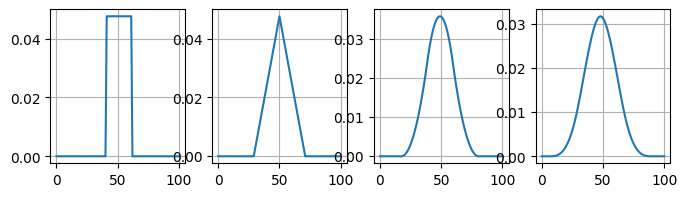

In [13]:
N = 101 
L = 10 
m = N//2+1

porte = np.zeros(N)
porte[m-L:m+L+1] = 1 
porte = porte/porte.sum()

plt.figure(figsize=(8,2))
plt.subplot(141)
plt.plot(porte)
plt.grid()

triangle = conv1D(porte, porte)
plt.subplot(142)
plt.plot(triangle)
plt.grid()

arche_cosinus = conv1D(triangle, porte)
plt.subplot(143)
plt.plot(arche_cosinus)
plt.grid()

arche_cosinus2 = conv1D(arche_cosinus, porte)
plt.subplot(144)
plt.plot(arche_cosinus2)
plt.grid()

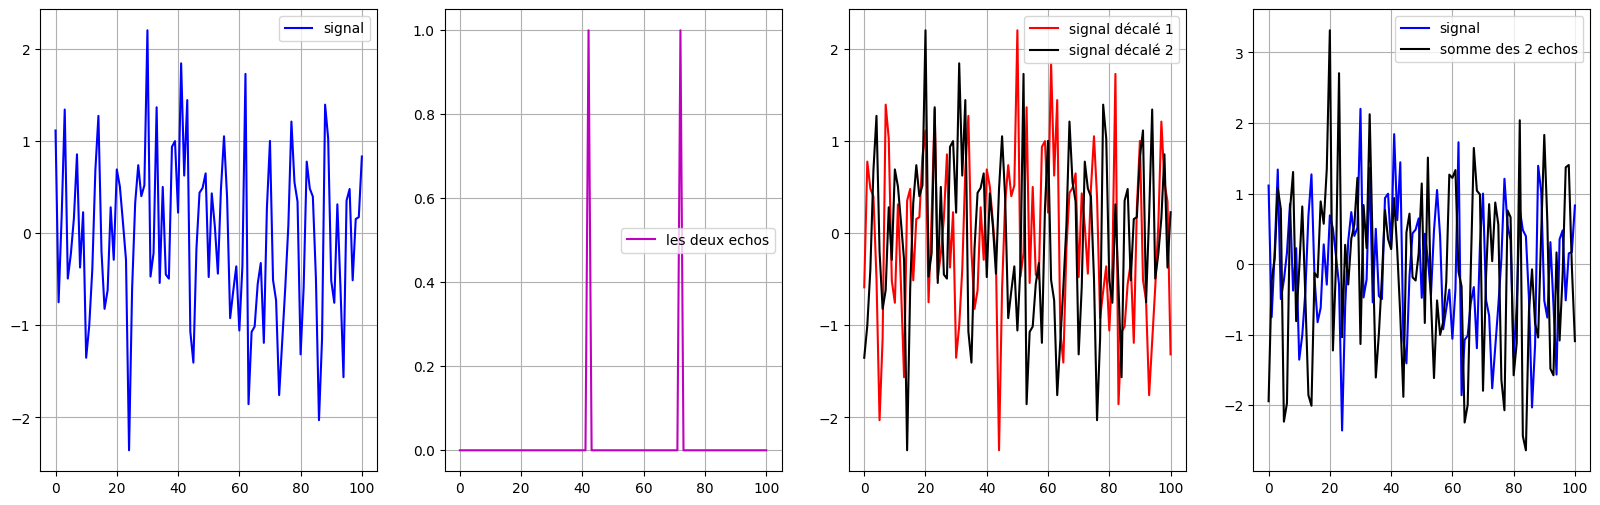

In [30]:
signal = np.random.randn(N)
echos1 = np.zeros(N)
echos2 = np.zeros(N)
echos1[52+20] = 1
echos2[52-10] = 1 
echos = echos1 + echos2 
convolutiona = conv1D(signal, echos1)
convolutionb = conv1D(signal, echos2)
convolution = conv1D(signal, echos)

plt.figure(figsize=(20,6))
plt.subplot(141)
plt.plot(signal, "b", label="signal")
plt.legend()
plt.grid()

plt.subplot(142)
plt.plot(echos, "m", label="les deux echos")
plt.legend()
plt.grid()

plt.subplot(143)
plt.plot(convolutiona, "r", label="signal décalé 1")
plt.plot(convolutionb, "k", label="signal décalé 2")
plt.legend()
plt.grid()

plt.subplot(144)
plt.plot(signal, "b", label="signal")
plt.plot(convolution, "k", label = "somme des 2 echos")
plt.legend()
plt.grid()

In [31]:
def conv2D(f, g, Nfft):
    TF_f = fft2(fftshift(f), (Nfft,Nfft))
    TF_g = fft2(fftshift(g), (Nfft,Nfft))
    produit = TF_f * TF_g
    convolution = fftshift(np.real(ifft2( produit )))
    return convolution

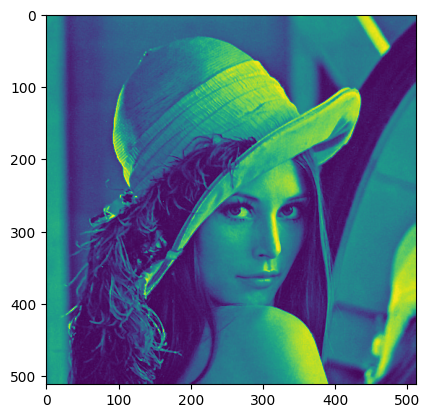

In [32]:
img = plt.imread("lena.png")
img = np.sum(img, axis=2) 
plt.imshow(img)

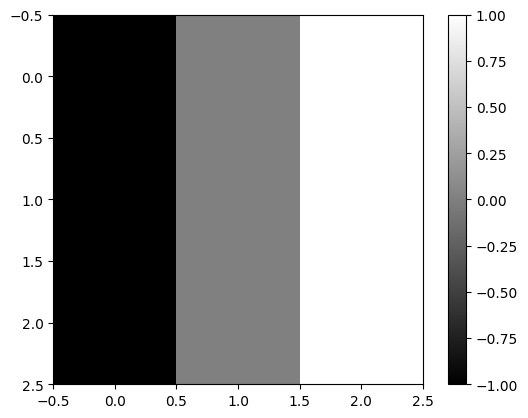

In [35]:
filtre_H = [[-1,0,1], [-1,0,1], [-1,0,1]]
plt.imshow(filtre_H, cmap="gray")
plt.colorbar()

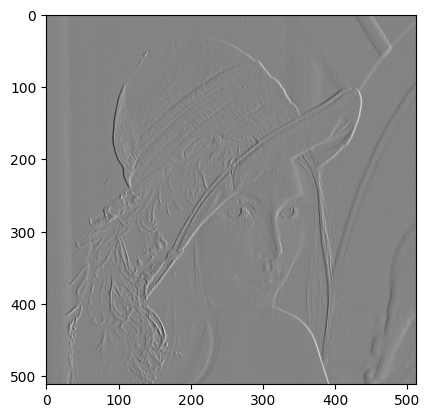

In [38]:
conv = conv2D(img, filtre_H, 512)
plt.imshow(conv, cmap="gray_r")

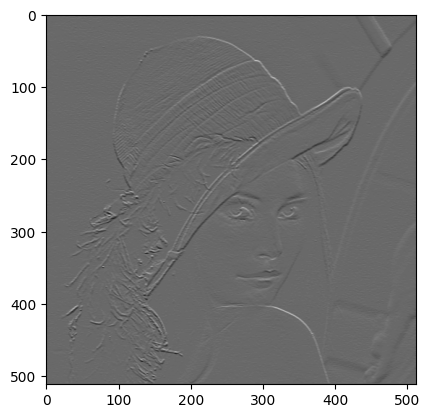

In [39]:
filtre_V = [[1,1,1],[0,0,0],[-1,-1,-1]]
conv = conv2D(img, filtre_V, 512)
plt.imshow(conv, cmap="gray_r")

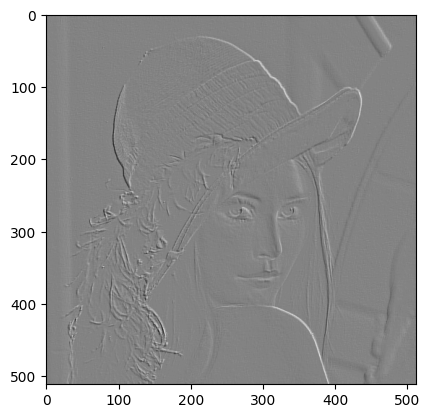

In [42]:
filtre_V = [[0,  1,  1],
            [-1,  0,  1],
            [-1,  -1, 0]]
conv = conv2D(img, filtre_V, 512)
plt.imshow(conv, cmap="gray_r")

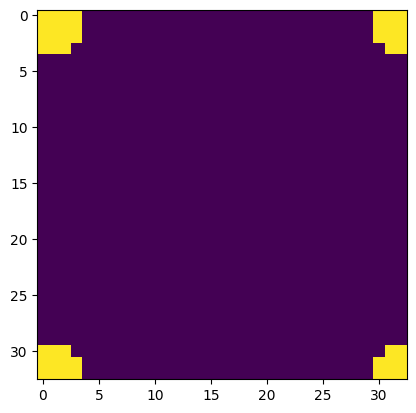

In [61]:
N = 33
x = np.arange(N)
xx,yy = np.meshgrid(x,x)
xx = xx - N//2-1
yy = yy - N//2-1
r = np.sqrt(xx**2 + yy**2)

masque = fftshift(r<4) 

plt.imshow(masque)

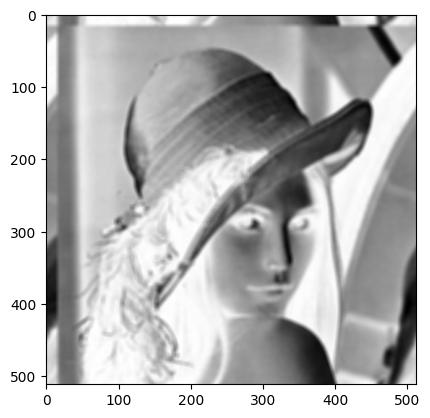

In [62]:
conv = conv2D(img, masque, 512)
plt.imshow(conv, cmap="gray_r")